In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import random

from sklearn import linear_model

In [2]:
ldw = pd.read_csv("ldw.csv")
ldw.shape

(15341, 10)

In [3]:
ldw = ldw.dropna()
ldw.shape

(13843, 10)

## TRain 

In [4]:
nModel = linear_model.LinearRegression()
nModel.fit(ldw[["sunshine"]], ldw["global_radiation"])

LinearRegression()

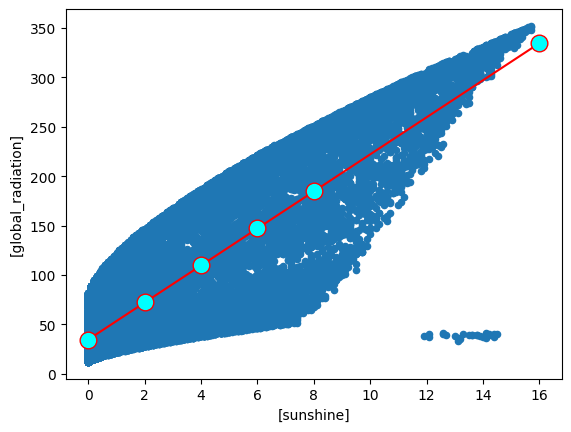

In [5]:
## Đối chiếu mô hình và Data

ldw.plot.scatter(x=["sunshine"],y=["global_radiation"])
nx = np.array([0,2,4,6,8,16])
ny = nx * nModel.coef_[0] +  nModel.intercept_
plt.plot(nx, ny ,color="red", marker='o',
     markerfacecolor='cyan', markersize=12)
plt.show()

## Phân tích Giá BaDoSa

In [6]:
!curl  "https://raw.githubusercontent.com/AdTekDev/EmT.DS/main/05-Data/data-RealEstateDataSet.csv"  > bds.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 85 35469   85 30162    0     0  23207      0  0:00:01  0:00:01 --:--:-- 23219
100 35469  100 35469    0     0  25664      0  0:00:01  0:00:01 --:--:-- 25683


In [7]:
bds = pd.read_csv("bds.csv")

In [8]:
bds.shape , bds.columns

((511, 14),
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT', 'MEDV'],
       dtype='object'))

In [9]:
bds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [10]:
## loại bỏ RÁC  dạng NULL

bds = bds.dropna()
bds.shape



(506, 14)

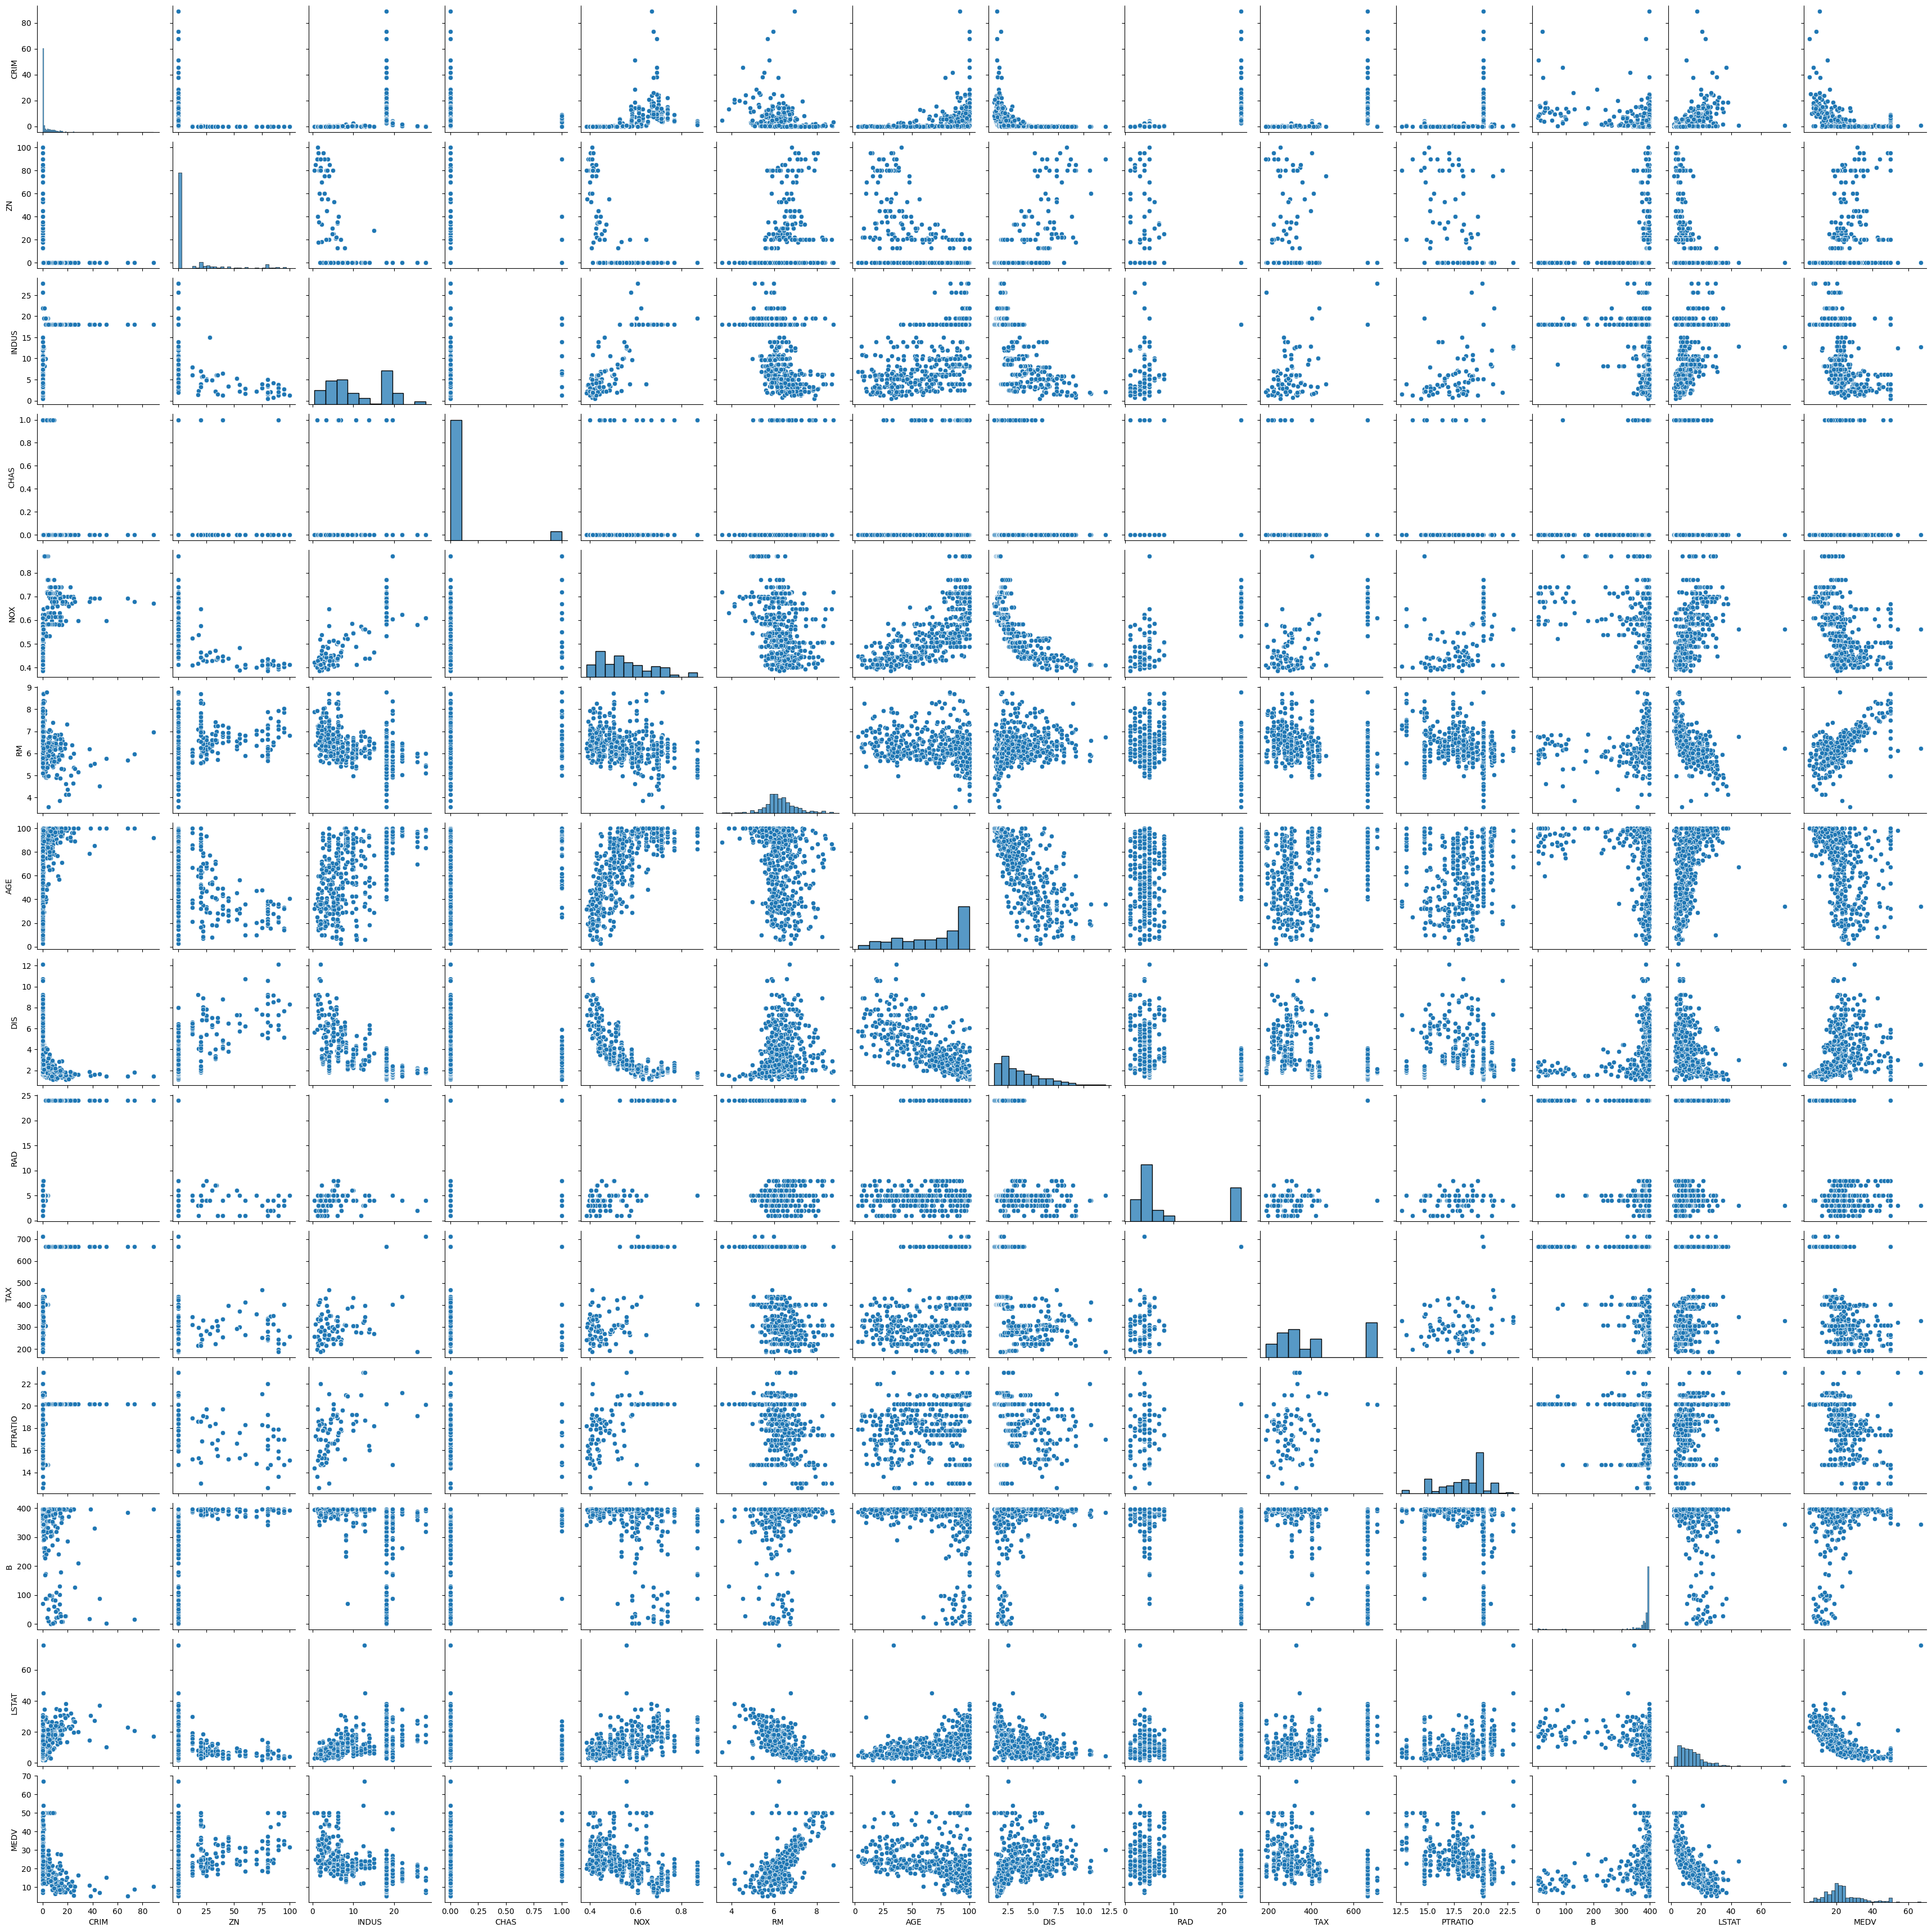

In [11]:
## quan sát Data , mối quan hệ giữa các biến

sns.pairplot(bds)

<Axes: >

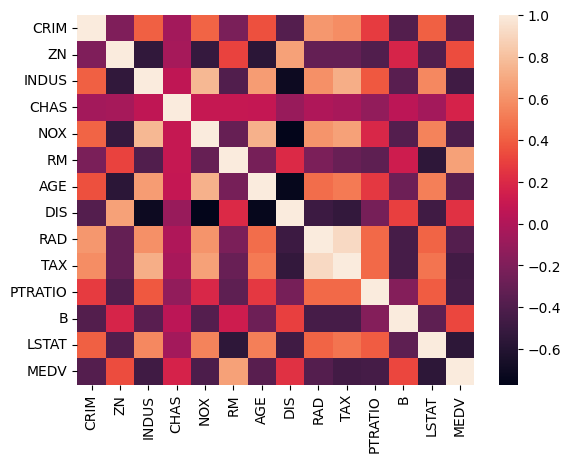

In [12]:
sns.heatmap(bds.corr())

In [13]:
## Train model 1 biến

nModel = linear_model.LinearRegression()
nModel.fit(bds[["RAD"]], bds["TAX"])


LinearRegression()

In [14]:
print(nModel.coef_)

[17.59612519]


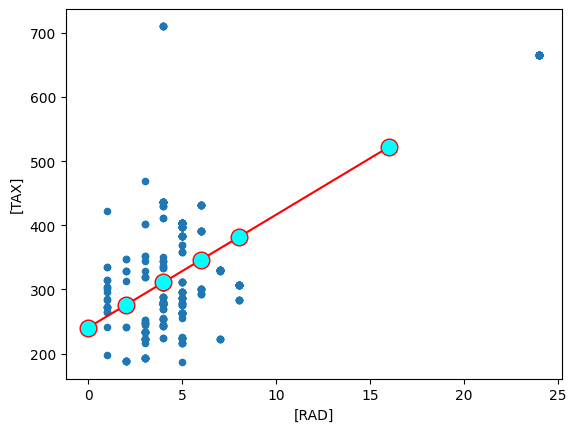

In [15]:
## Đối chiếu mô hình và Data

bds.plot.scatter(x=["RAD"],y=["TAX"])
nx = np.array([0,2,4,6,8,16])
ny = nx * nModel.coef_[0] +  nModel.intercept_
plt.plot(nx, ny ,color="red", marker='o',
     markerfacecolor='cyan', markersize=12)
plt.show()